<div style="text-align: center; color: Red; font-family: Arial;">
    <h1> Multi-Class Prediction of Obesity Risk </h1>
</div>

## `01` Business Problem Understanding :
- The aim is to estimate the risk of obesity, which is associated with cardiovascular disease in individuals.

## `02` Data Understanding¶
- id: Personal ID
- Gender: Gender of the person concerned
- Age: Age of the person concerned
- Height: Height of the person concerned
- Weight: Weight of the person concerned
- family_history_with_overweight: Information on whether there are overweight people in the family
- FAVC: Frequent Consumption of High Caloric Food
- FCVC: Frequency of Consumption of Vegetables
- NCP: Number of Main Meals per Day
- CAEC: Consumption of Food Between Meals
- SMOKE: Information on whether the person concerned is a smoker
- CH2O: Daily Water Consumption
- SCC: Monitoring Caloric Intake
- FAF: Physical Activity Frequency
- TUE: Time Using Technology Devices
- CALC: Consumption of Alcohol
- MTRANS: Vehicle information used by the person concerned for transportation
- NObeyesdad: Type of obesity

## `03` Project Objective:-

- The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk across multiple classes. classifying individuals based on their obesity risk and interpreting model predictions, we aim to empower individuals with a deeper understanding of their health status. Additionally, this model can serve as a valuable tool for healthcare professionals, enabling early intervention and personalized recommendations to mitigate obesity-related health risks.

## `04` Code :

## `04.0` Constants

In [267]:
LEARNING_RATE = 0.001
N_OF_ESTIMATES = 500
RANDOM_SEED = 42

## `04.1` import libraries

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [15]:
from sklearn.metrics import  classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
from utils import *

## `04.2` Read Data

In [120]:
# train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
# test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [121]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [122]:
train_df = train.copy()
test_df = test.copy()

## `04.3` EDA

In [21]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
train.shape

(20758, 18)

In [23]:
train.rename(columns={"family_history_with_overweight": "family_history"}, inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20758 non-null  int64  
 1   Gender          20758 non-null  object 
 2   Age             20758 non-null  float64
 3   Height          20758 non-null  float64
 4   Weight          20758 non-null  float64
 5   family_history  20758 non-null  object 
 6   FAVC            20758 non-null  object 
 7   FCVC            20758 non-null  float64
 8   NCP             20758 non-null  float64
 9   CAEC            20758 non-null  object 
 10  SMOKE           20758 non-null  object 
 11  CH2O            20758 non-null  float64
 12  SCC             20758 non-null  object 
 13  FAF             20758 non-null  float64
 14  TUE             20758 non-null  float64
 15  CALC            20758 non-null  object 
 16  MTRANS          20758 non-null  object 
 17  NObeyesdad      20758 non-null 

In [25]:
train.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
id,20758.000000,10378.500000,5992.462780,0.000000,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [26]:
train.isnull().sum()/train.shape[0] # percentage of the null values

id                0.0
Gender            0.0
Age               0.0
Height            0.0
Weight            0.0
family_history    0.0
FAVC              0.0
FCVC              0.0
NCP               0.0
CAEC              0.0
SMOKE             0.0
CH2O              0.0
SCC               0.0
FAF               0.0
TUE               0.0
CALC              0.0
MTRANS            0.0
NObeyesdad        0.0
dtype: float64

In [27]:
train.duplicated().sum()

np.int64(0)

In [28]:
numerical = train.select_dtypes(include=["number"])
numerical.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [29]:
categorical = train.select_dtypes(include=["object"])
categorical.columns

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'NObeyesdad'],
      dtype='object')

In [30]:
for col in list(train.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)
    
    print("\n" + "-"*40 + "\n")

Column: Gender's count values:



,Value,Count
0,Female,10422
1,Male,10336



----------------------------------------

Column: family_history's count values:



,Value,Count
0,yes,17014
1,no,3744



----------------------------------------

Column: FAVC's count values:



,Value,Count
0,yes,18982
1,no,1776



----------------------------------------

Column: CAEC's count values:



,Value,Count
0,Sometimes,17529
1,Frequently,2472
2,Always,478
3,no,279



----------------------------------------

Column: SMOKE's count values:



,Value,Count
0,no,20513
1,yes,245



----------------------------------------

Column: SCC's count values:



,Value,Count
0,no,20071
1,yes,687



----------------------------------------

Column: CALC's count values:



,Value,Count
0,Sometimes,15066
1,no,5163
2,Frequently,529



----------------------------------------

Column: MTRANS's count values:



,Value,Count
0,Public_Transportation,16687
1,Automobile,3534
2,Walking,467
3,Motorbike,38
4,Bike,32



----------------------------------------

Column: NObeyesdad's count values:



,Value,Count
0,Obesity_Type_III,4046
1,Obesity_Type_II,3248
2,Normal_Weight,3082
3,Obesity_Type_I,2910
4,Insufficient_Weight,2523
5,Overweight_Level_II,2522
6,Overweight_Level_I,2427



----------------------------------------



In [31]:
# Loop over numerical columns
for col in list(train.select_dtypes(include='number')):
    print(f"Column: {col} - Value Counts:\n")
    
    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)

    print("\n" + "-"*40 + "\n")


Column: id - Value Counts:



,Value,Count
0,20757,1
1,0,1
2,1,1
3,2,1
4,3,1
...,...,...
20753,10,1
20754,9,1
20755,8,1
20756,7,1



----------------------------------------

Column: Age - Value Counts:



,Value,Count
0,18.000000,1916
1,26.000000,1806
2,21.000000,1643
3,23.000000,1202
4,19.000000,886
...,...,...
1698,17.504873,1
1699,21.580858,1
1700,39.128946,1
1701,25.746113,1



----------------------------------------

Column: Height - Value Counts:



,Value,Count
0,1.700000,1334
1,1.650000,782
2,1.600000,672
3,1.750000,659
4,1.800000,517
...,...,...
1828,1.815347,1
1829,1.718180,1
1830,1.702958,1
1831,1.716590,1



----------------------------------------

Column: Weight - Value Counts:



,Value,Count
0,80.000000,866
1,75.000000,630
2,50.000000,618
3,60.000000,506
4,70.000000,486
...,...,...
1974,110.622764,1
1975,104.554925,1
1976,108.790549,1
1977,44.096062,1



----------------------------------------

Column: FCVC - Value Counts:



,Value,Count
0,3.000000,7658
1,2.000000,7653
2,1.000000,275
3,2.967300,121
4,2.766612,54
...,...,...
929,2.973499,1
930,2.417635,1
931,2.690754,1
932,2.099687,1



----------------------------------------

Column: NCP - Value Counts:



,Value,Count
0,3.000000,14706
1,1.000000,1976
2,4.000000,715
3,2.993623,39
4,2.695396,25
...,...,...
684,2.818026,1
685,1.164839,1
686,2.152733,1
687,2.814518,1



----------------------------------------

Column: CH2O - Value Counts:



,Value,Count
0,2.000000,6616
1,1.000000,2799
2,3.000000,1571
3,2.825629,77
4,2.868167,60
...,...,...
1501,2.200588,1
1502,2.938687,1
1503,1.728332,1
1504,2.983889,1



----------------------------------------

Column: FAF - Value Counts:



,Value,Count
0,0.000000,5044
1,1.000000,4097
2,2.000000,2391
3,3.000000,800
4,1.097905,56
...,...,...
1355,2.523793,1
1356,0.988668,1
1357,0.271174,1
1358,0.540397,1



----------------------------------------

Column: TUE - Value Counts:



,Value,Count
0,0.000000,6566
1,1.000000,4326
2,2.000000,1133
3,0.002600,78
4,0.723154,65
...,...,...
1292,0.290979,1
1293,0.733085,1
1294,0.768071,1
1295,1.967919,1



----------------------------------------



In [32]:
# Initialize lists to store results
number_of_outliers = [None] * len(train.select_dtypes(include=["number"]).columns)
q99 = [None] * len(train.select_dtypes(include=["number"]).columns)
q1 = [None] * len(train.select_dtypes(include=["number"]).columns)
outlier_percentage = [None] * len(train.select_dtypes(include=["number"]).columns)
total_rows = len(train)

# Loop over numerical columns
for i, p in enumerate(train.select_dtypes(include=["number"]).columns):
    q99[i], q1[i] = np.percentile(train[p], [99, 1])
    
    # Identify outliers (values beyond 99th and 1st percentiles)
    outliers = (train[p] > q99[i]) | (train[p] < q1[i])
    number_of_outliers[i] = outliers.sum()
    
    # Calculate percentage of outliers
    outlier_percentage[i] = (number_of_outliers[i] / total_rows) * 100
    
    # Print the results
    print(f'Outliers in {p}: {number_of_outliers[i]} ({outlier_percentage[i]:.2f}% of total rows)')
    print("*" * 40)

Outliers in id: 416 (2.00% of total rows)
****************************************
Outliers in Age: 406 (1.96% of total rows)
****************************************
Outliers in Height: 411 (1.98% of total rows)
****************************************
Outliers in Weight: 334 (1.61% of total rows)
****************************************
Outliers in FCVC: 0 (0.00% of total rows)
****************************************
Outliers in NCP: 0 (0.00% of total rows)
****************************************
Outliers in CH2O: 0 (0.00% of total rows)
****************************************
Outliers in FAF: 0 (0.00% of total rows)
****************************************
Outliers in TUE: 0 (0.00% of total rows)
****************************************


In [33]:
# Convert results into a DataFrame for better readability
outlier_summary = pd.DataFrame({
    'Column': train.select_dtypes(include=["number"]).columns,
    'Number of Outliers': number_of_outliers,
    'Outlier Percentage': outlier_percentage,
    '1st Percentile (q1)': q1,
    '99th Percentile (q99)': q99
})

# Display the outlier summary
display(outlier_summary)

,Column,Number of Outliers,Outlier Percentage,1st Percentile (q1),99th Percentile (q99)
0,id,416,2.004047,207.570000,20549.430000
1,Age,406,1.955872,16.913841,41.000000
2,Height,411,1.979960,1.507106,1.889104
3,Weight,334,1.609018,42.000000,137.855041
4,FCVC,0,0.000000,1.000000,3.000000
5,NCP,0,0.000000,1.000000,4.000000
6,CH2O,0,0.000000,1.000000,3.000000
7,FAF,0,0.000000,0.000000,3.000000
8,TUE,0,0.000000,0.000000,2.000000


## `04.4` Visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

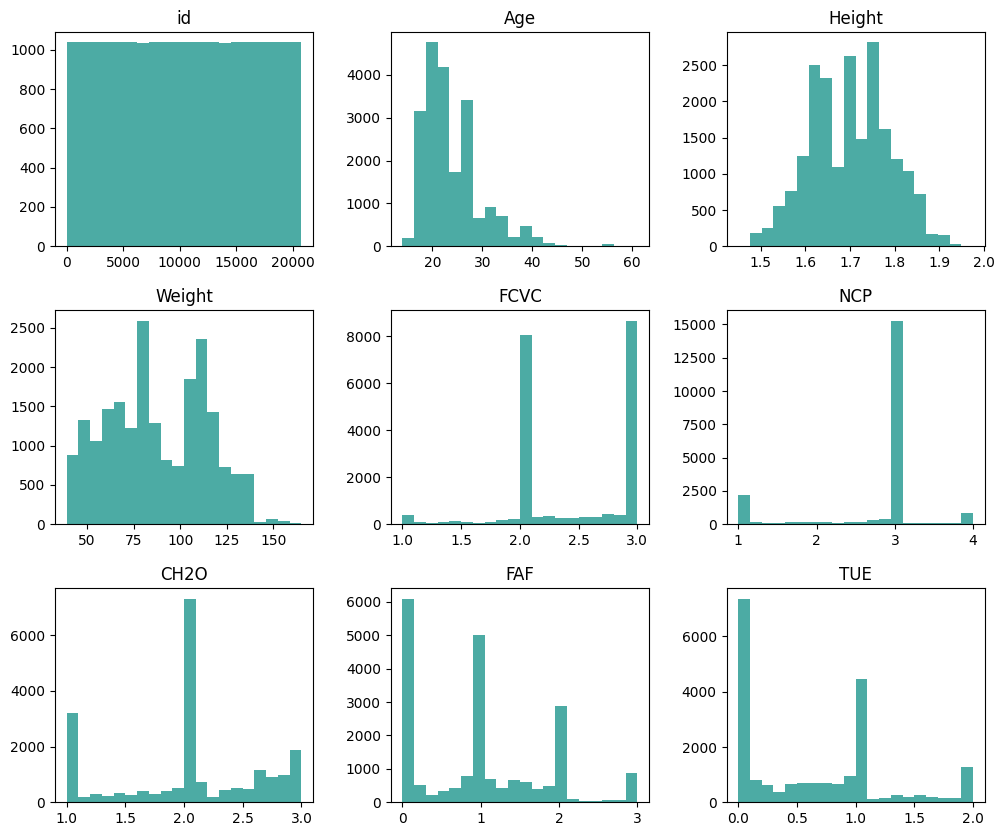

In [34]:
numerical.hist(figsize=(12, 10), bins=20, color='#4caba4', grid=False)

Plotting: Gender


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


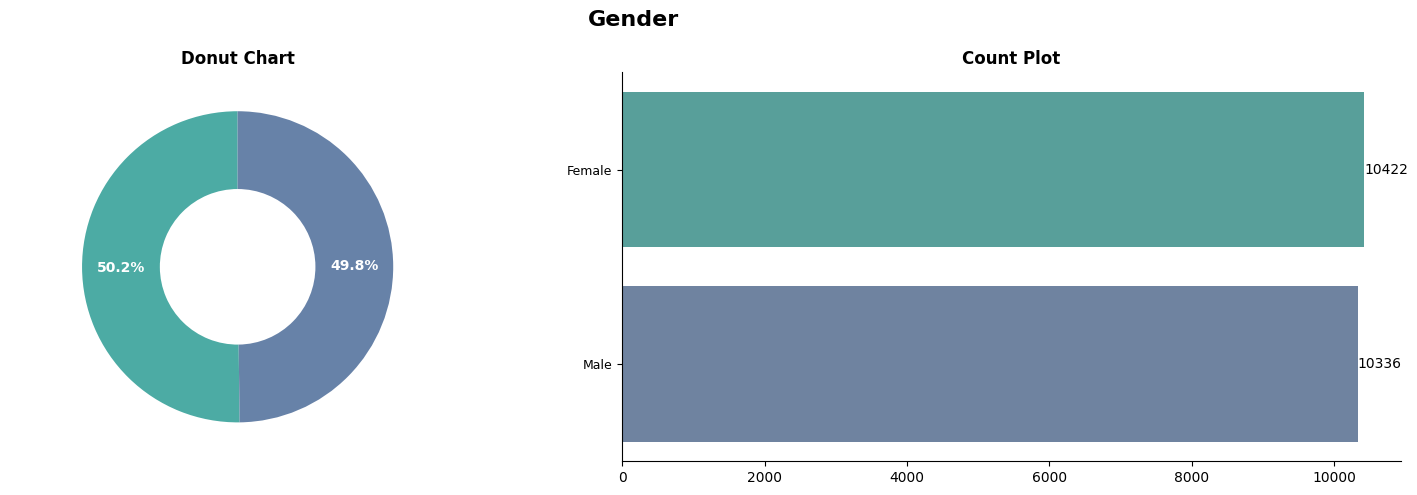

Plotting: family_history


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


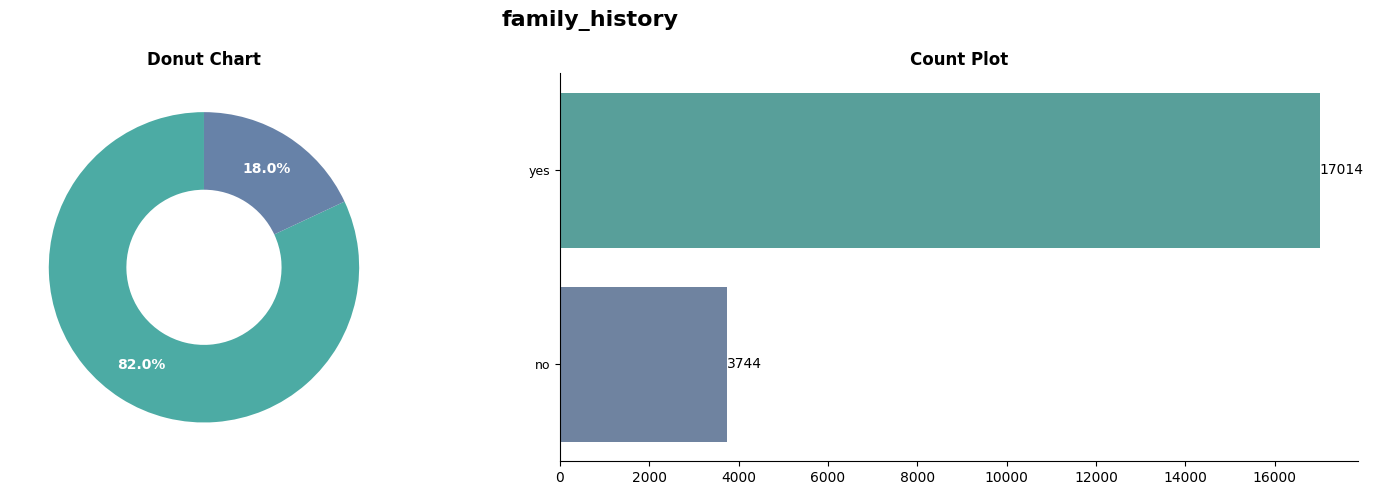

Plotting: FAVC


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


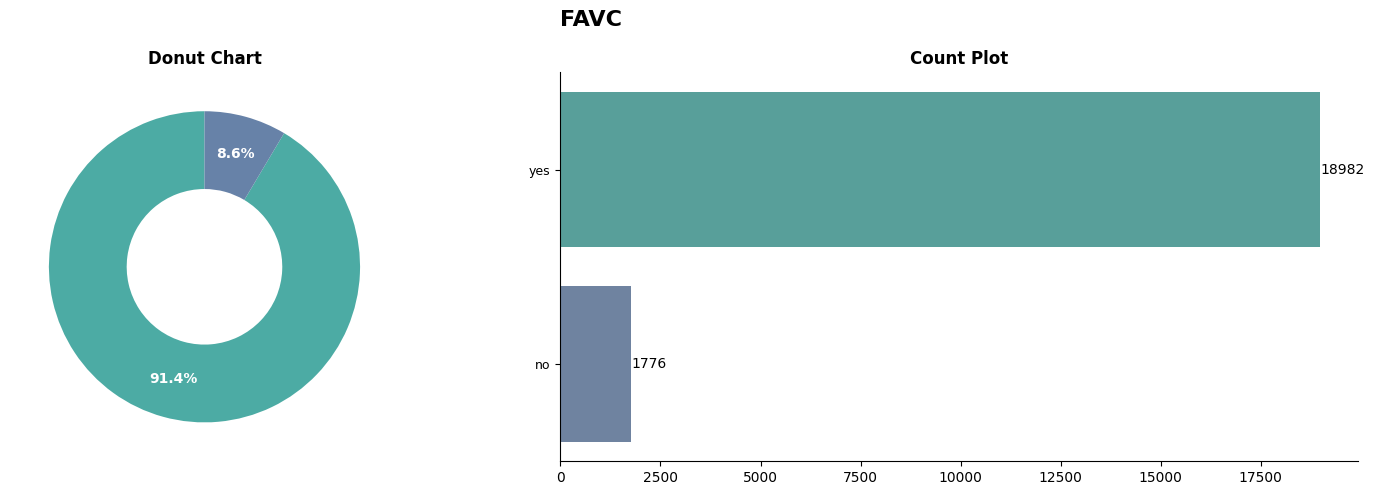

Plotting: CAEC


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


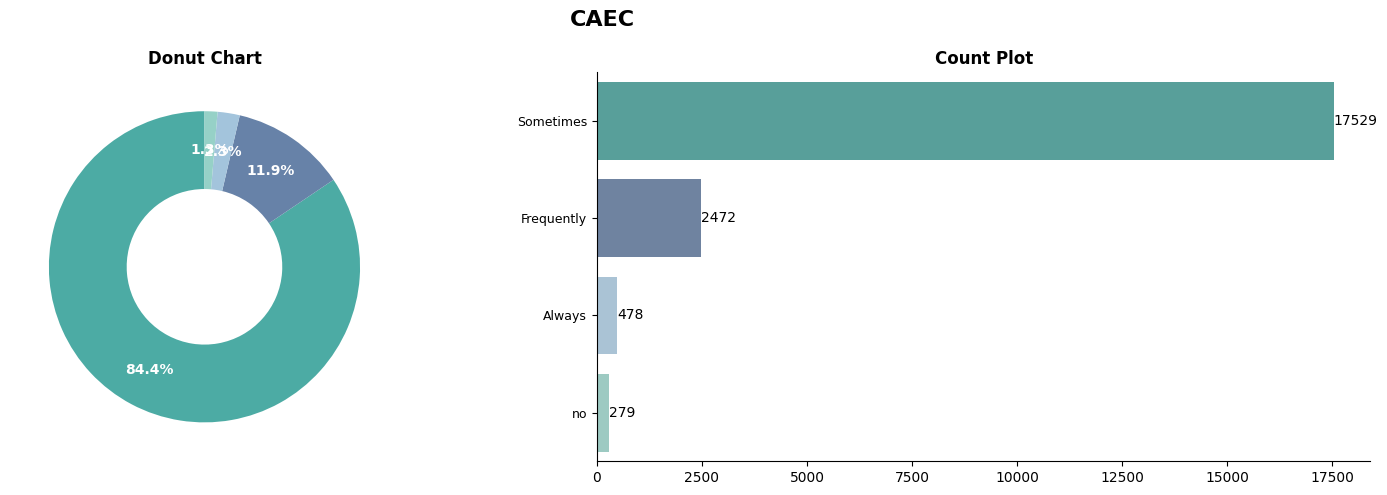

Plotting: SMOKE


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


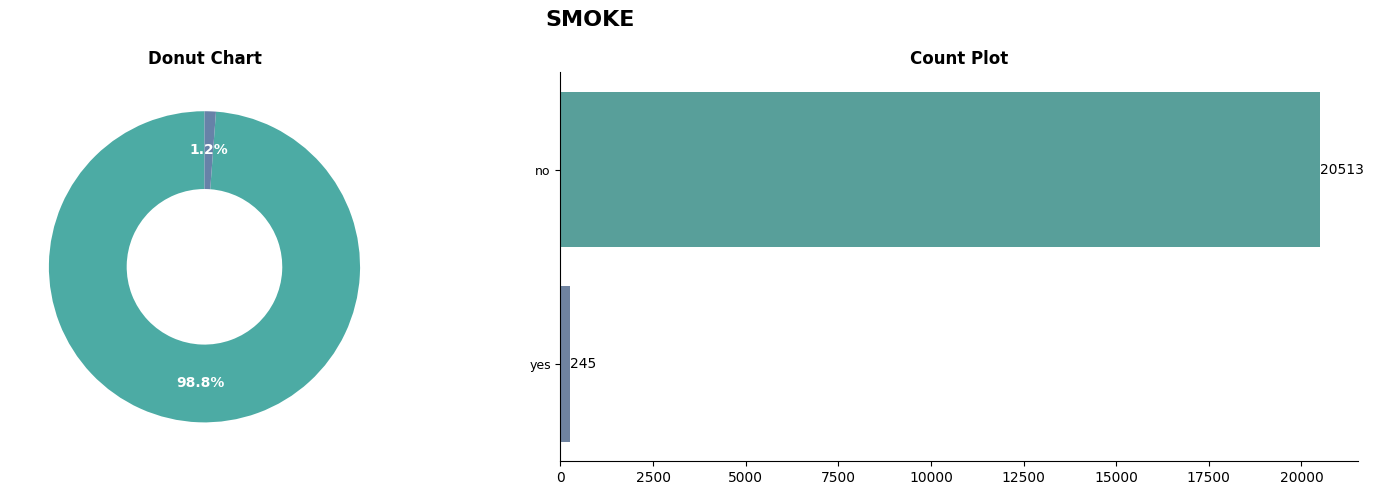

Plotting: SCC


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


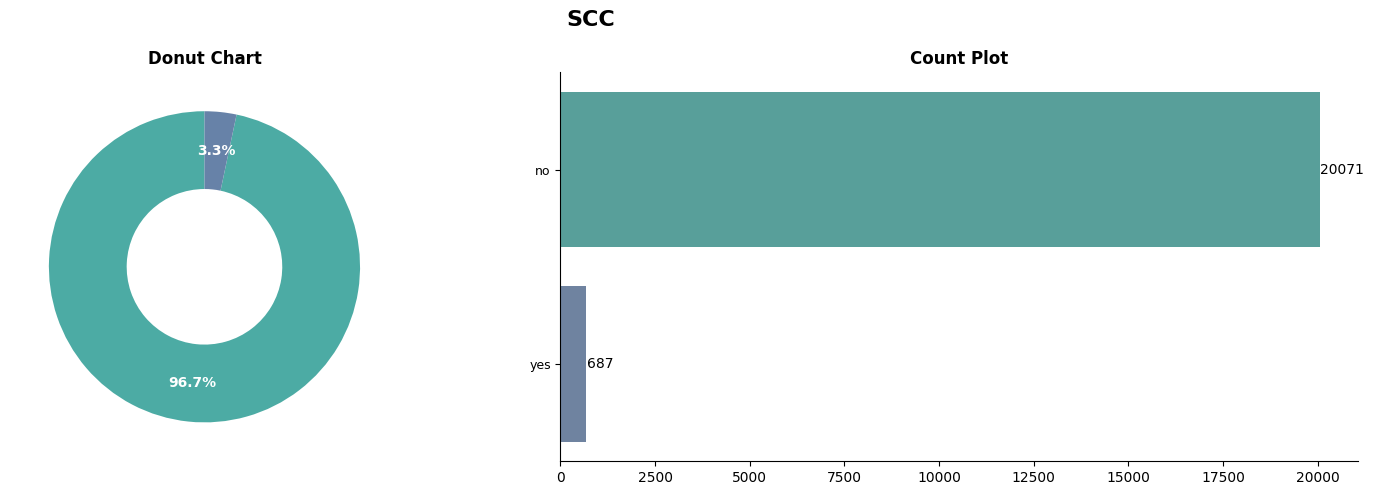

Plotting: CALC


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


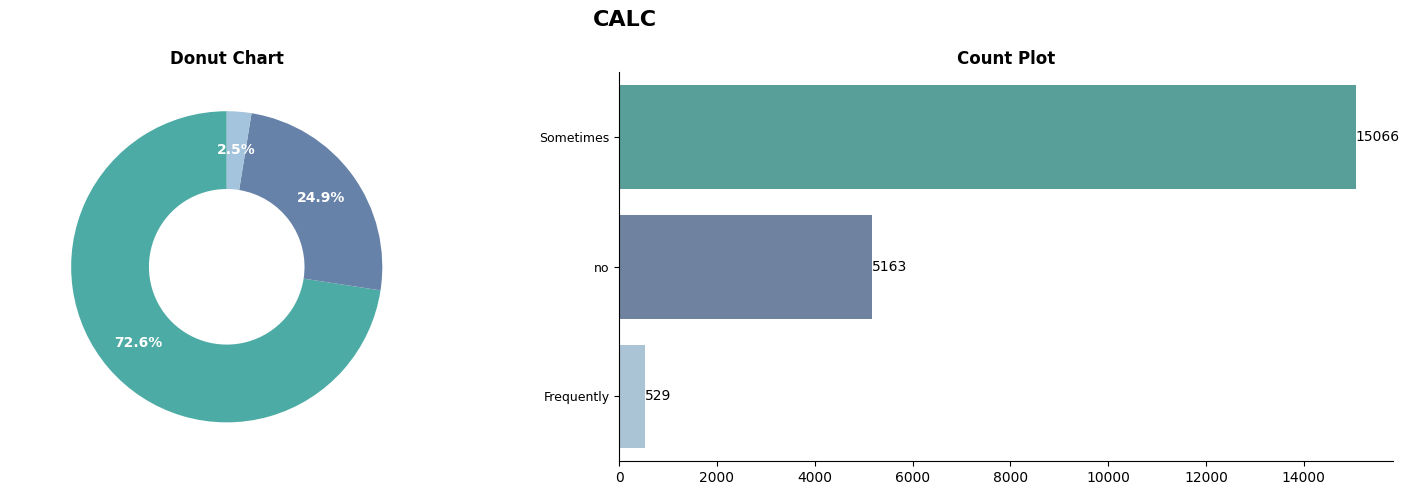

Plotting: MTRANS


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


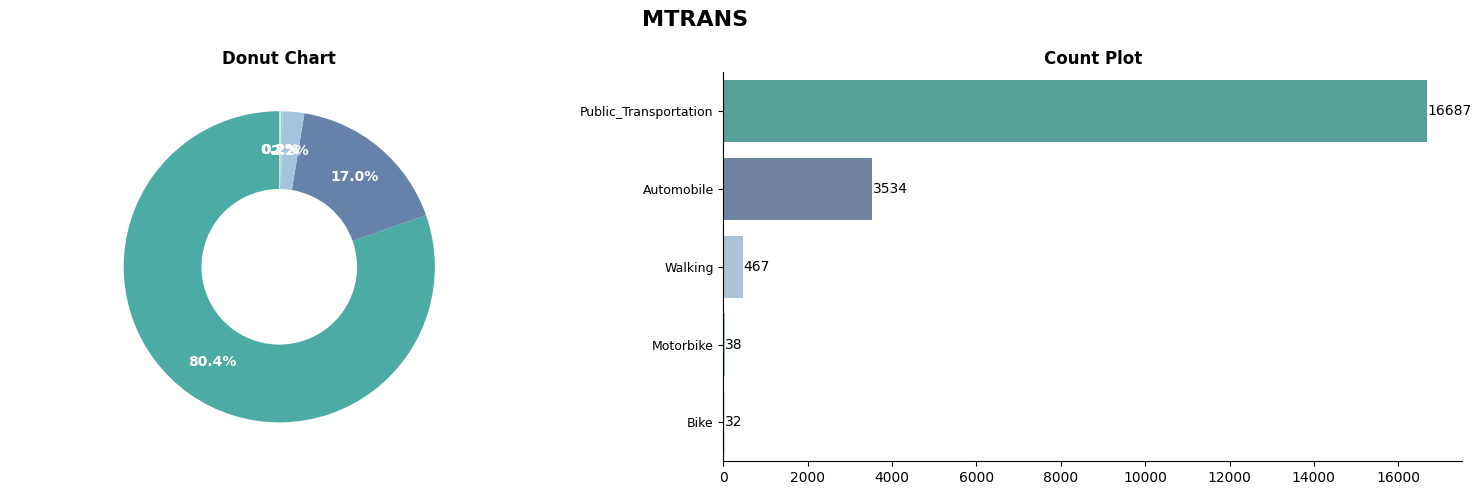

Plotting: NObeyesdad


/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


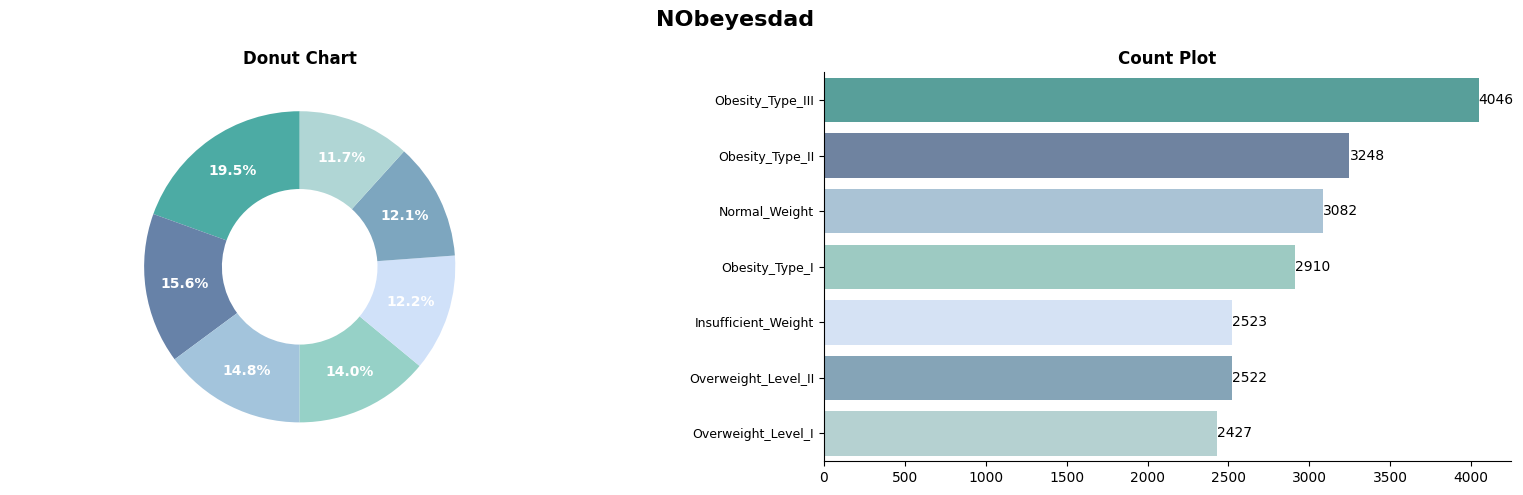

In [35]:
for column in categorical.columns:
    print(f"Plotting: {column}")
    try:
        categorical_analysis(column, categorical=categorical)
    except Exception as e:
        print(f"Error plotting {column}: {e}")

### Plot the relations of the NObeyesdad(Output) and categorical Columns

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


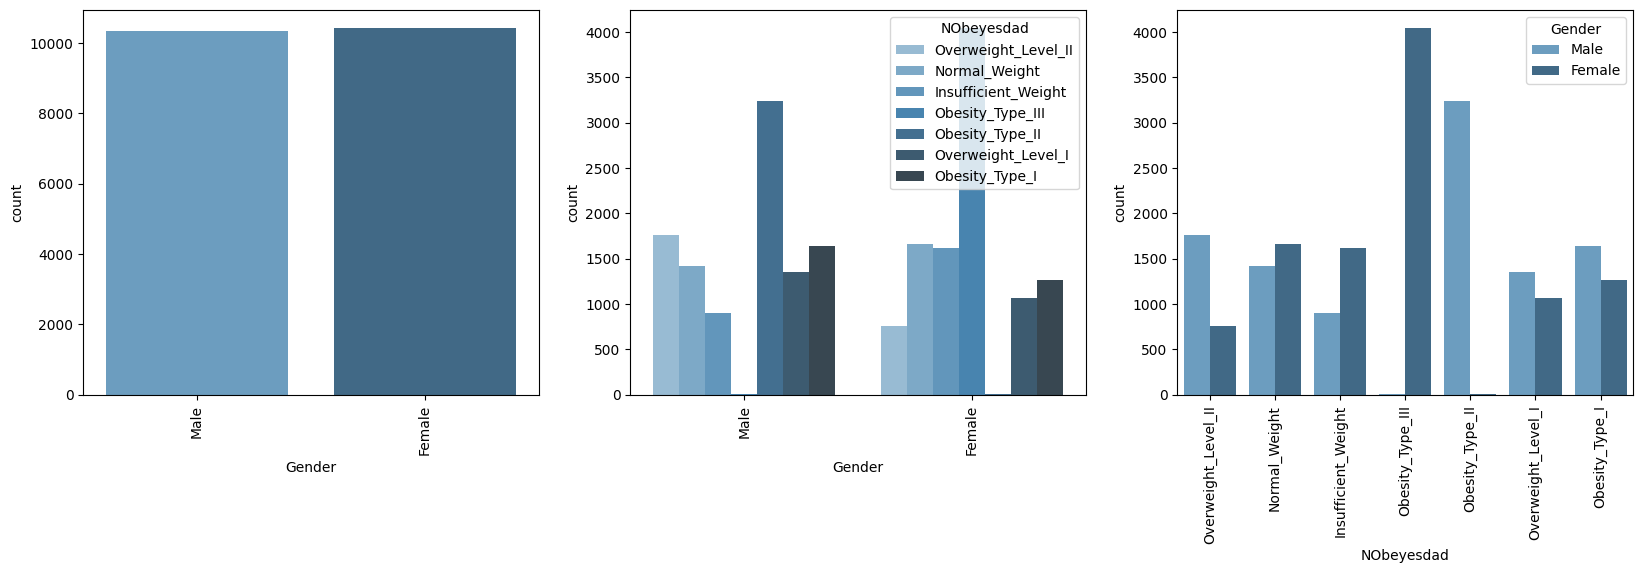

In [36]:
plot_categorical_data(train, "Gender")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


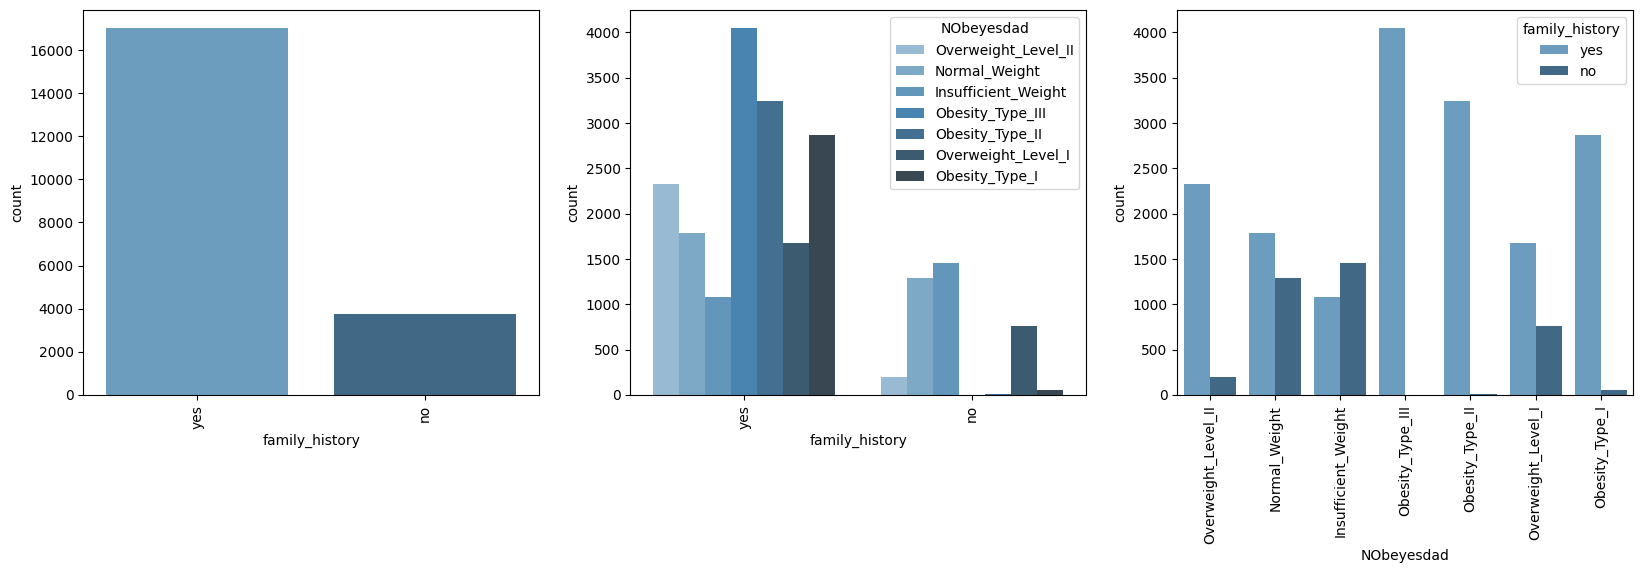

In [37]:
plot_categorical_data(train, "family_history")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


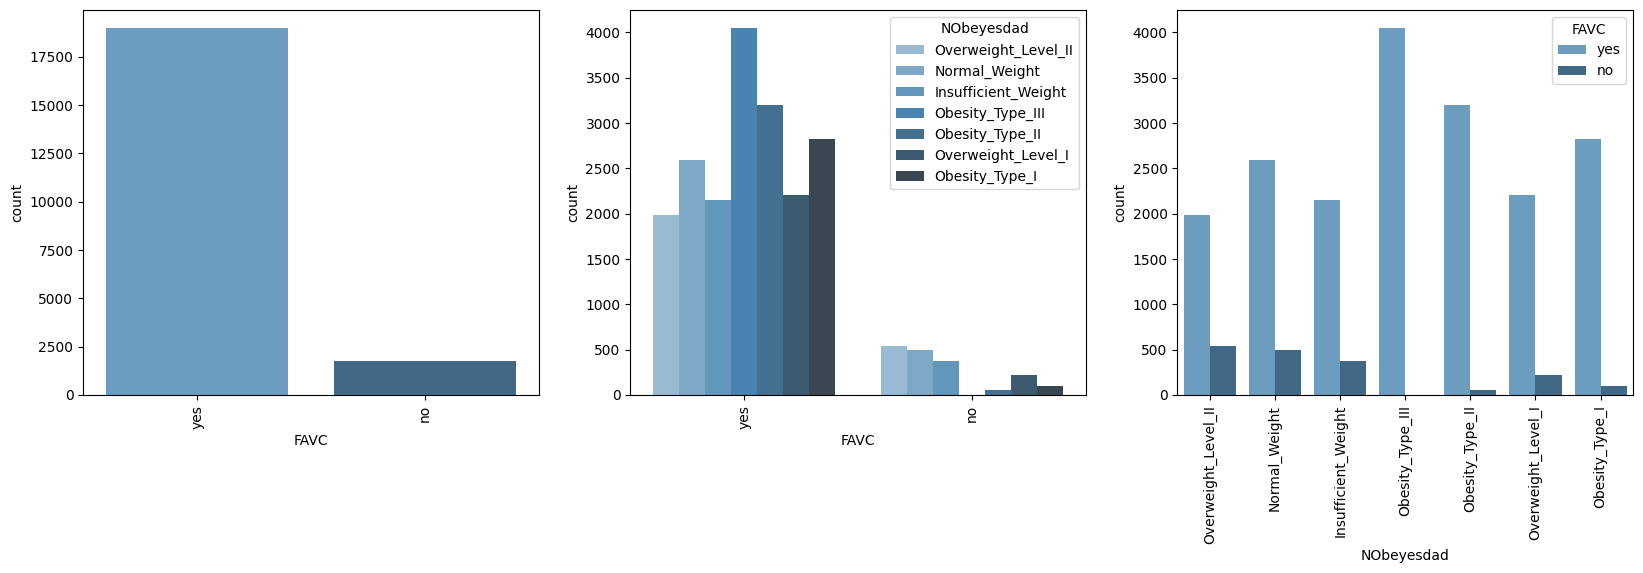

In [38]:
plot_categorical_data(train, "FAVC")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


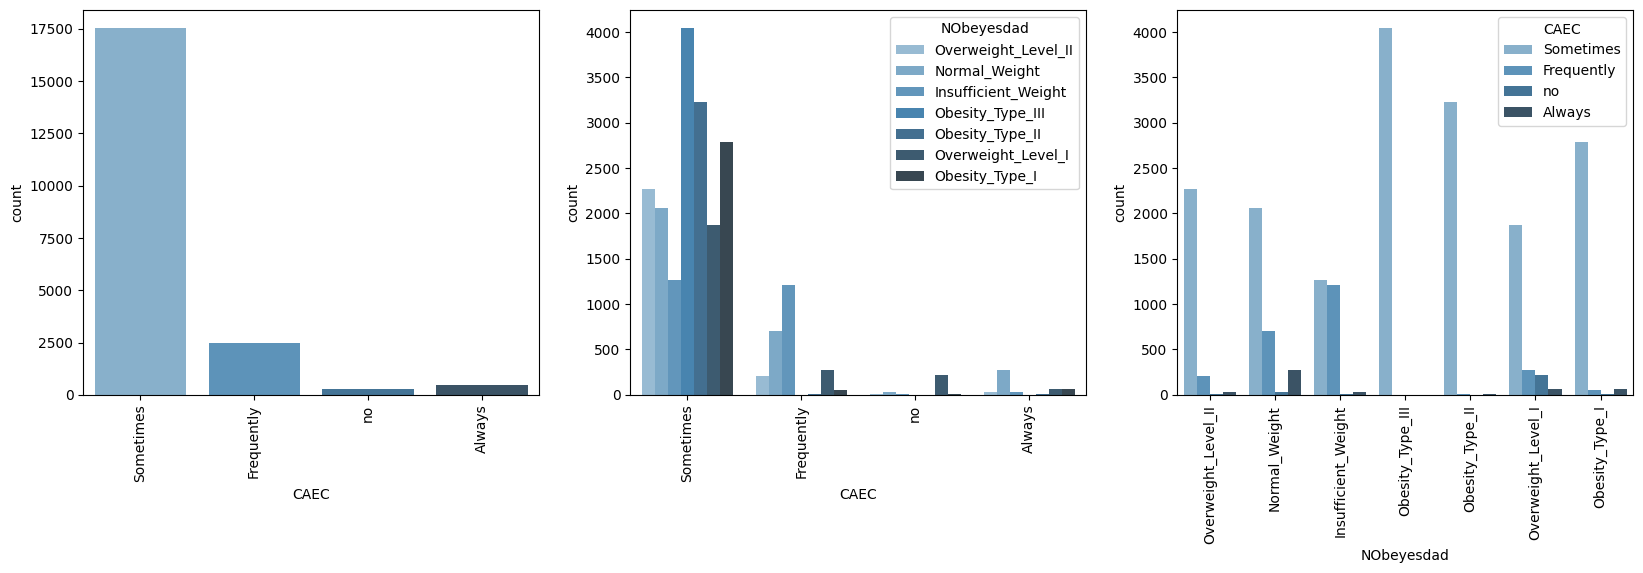

In [39]:
plot_categorical_data(train, "CAEC")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


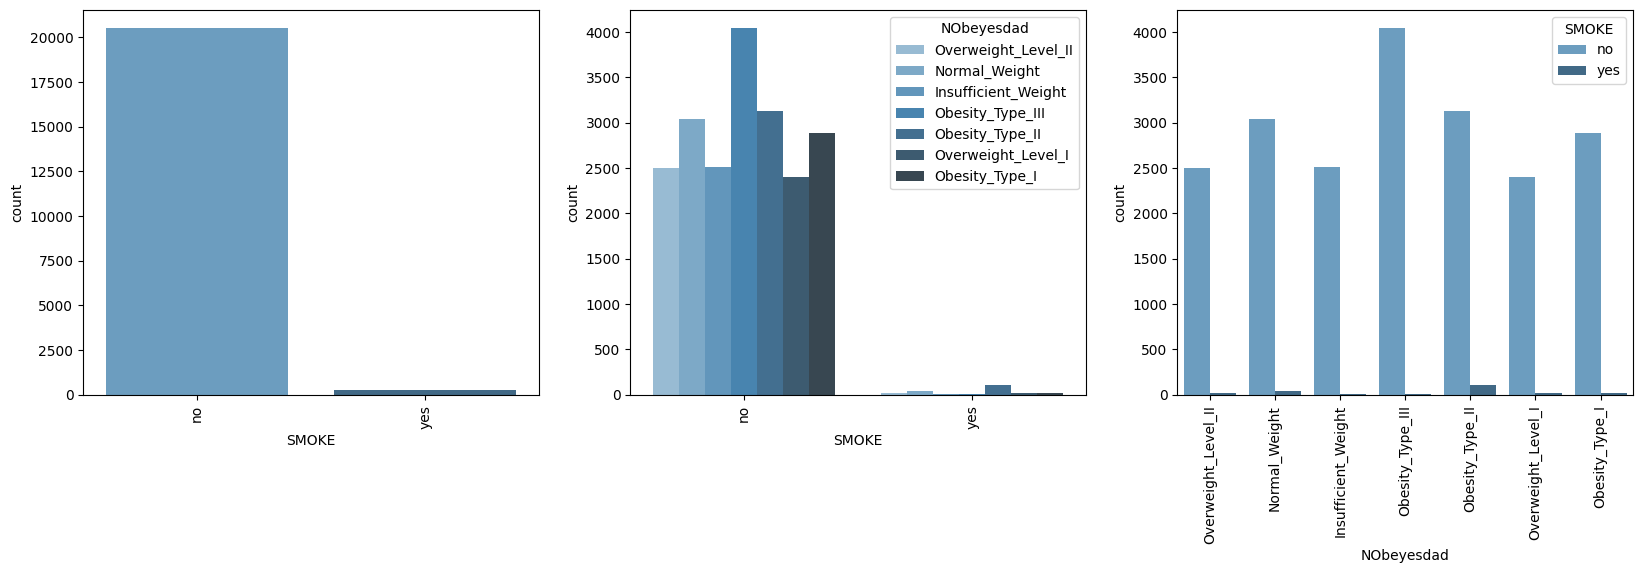

In [40]:
plot_categorical_data(train, "SMOKE")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


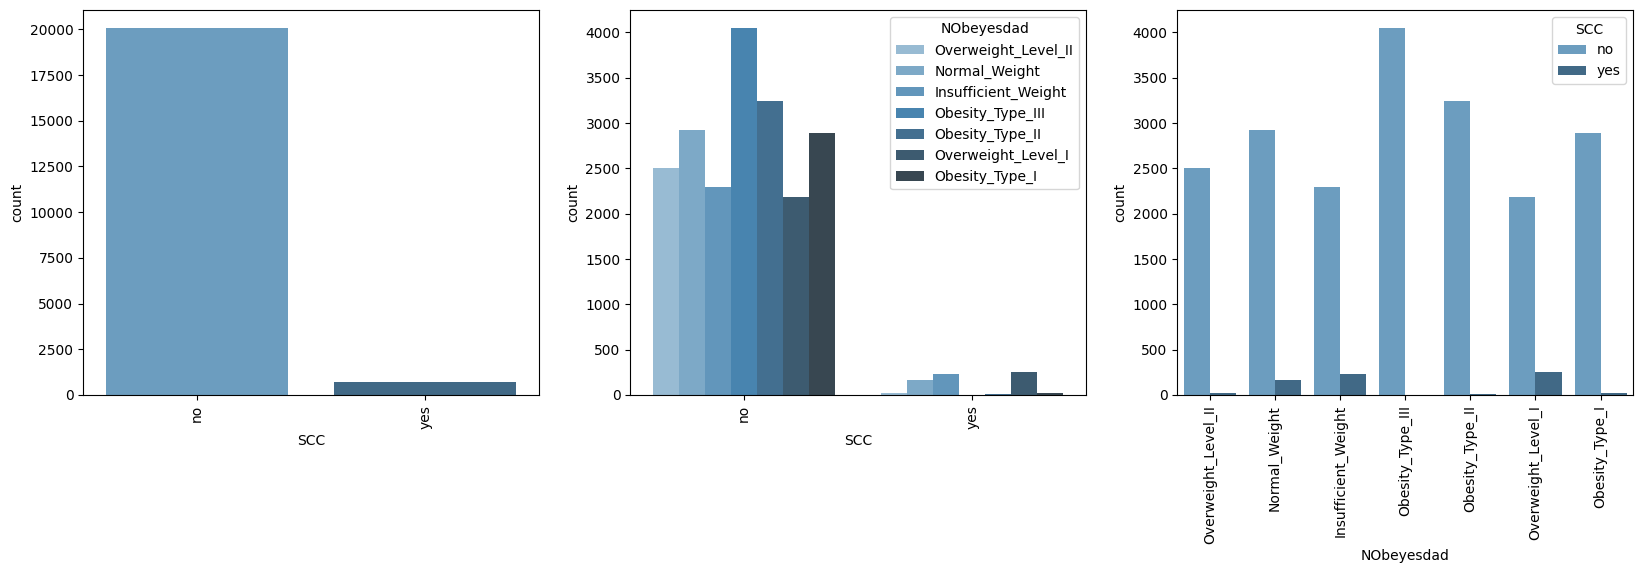

In [41]:
plot_categorical_data(train, "SCC")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


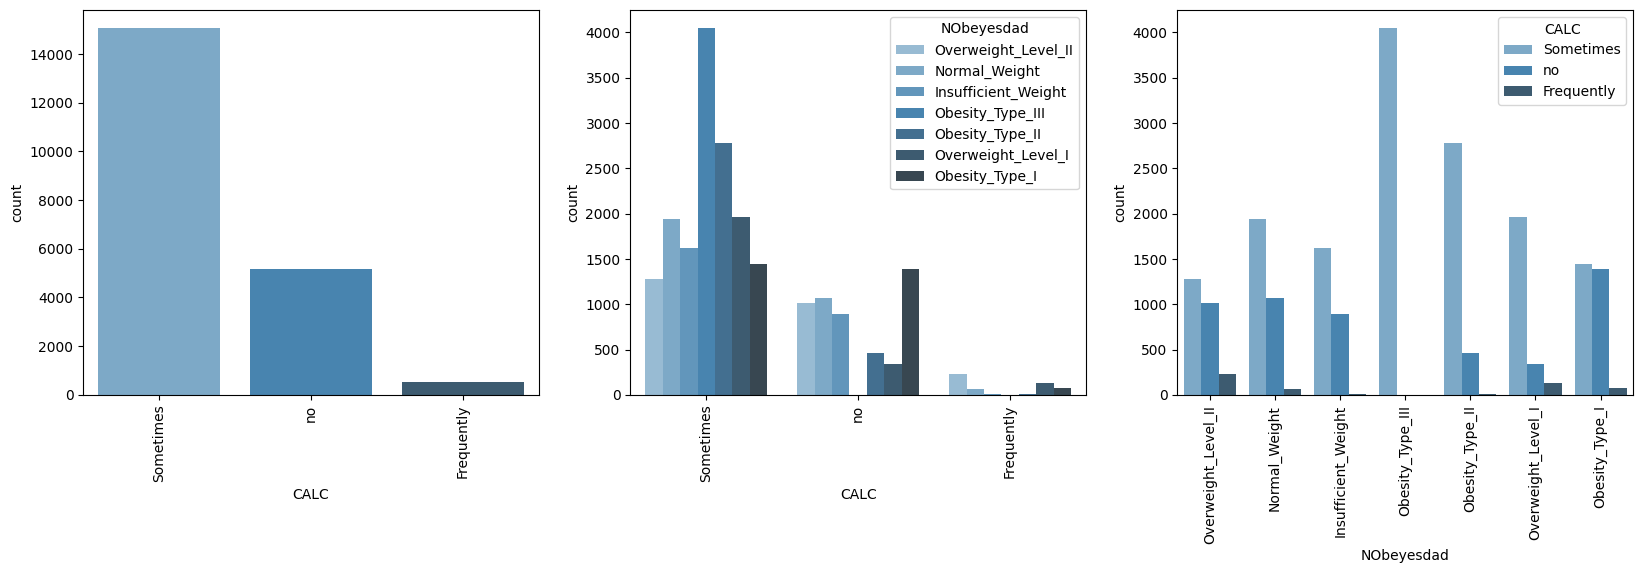

In [42]:
plot_categorical_data(train, "CALC")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


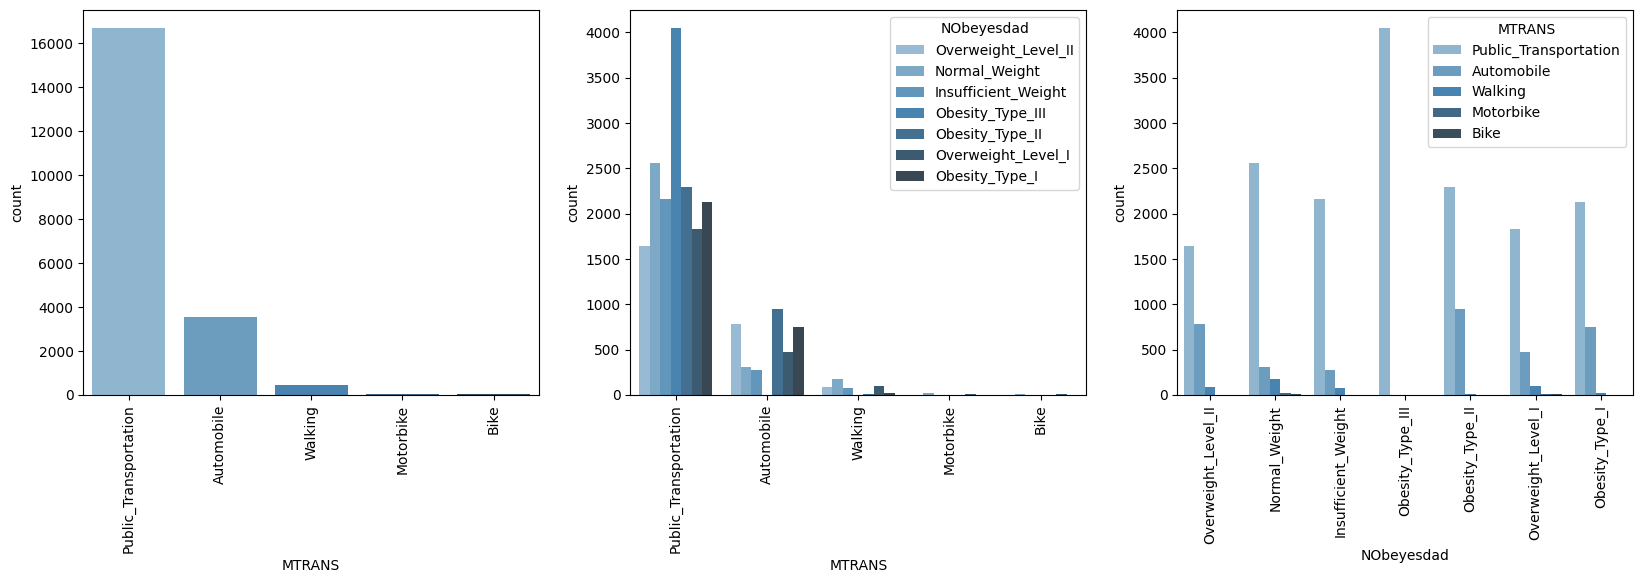

In [43]:
plot_categorical_data(train, "MTRANS")

### Plot the relations of the NObeyesdad(output) and Numerical Columns

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


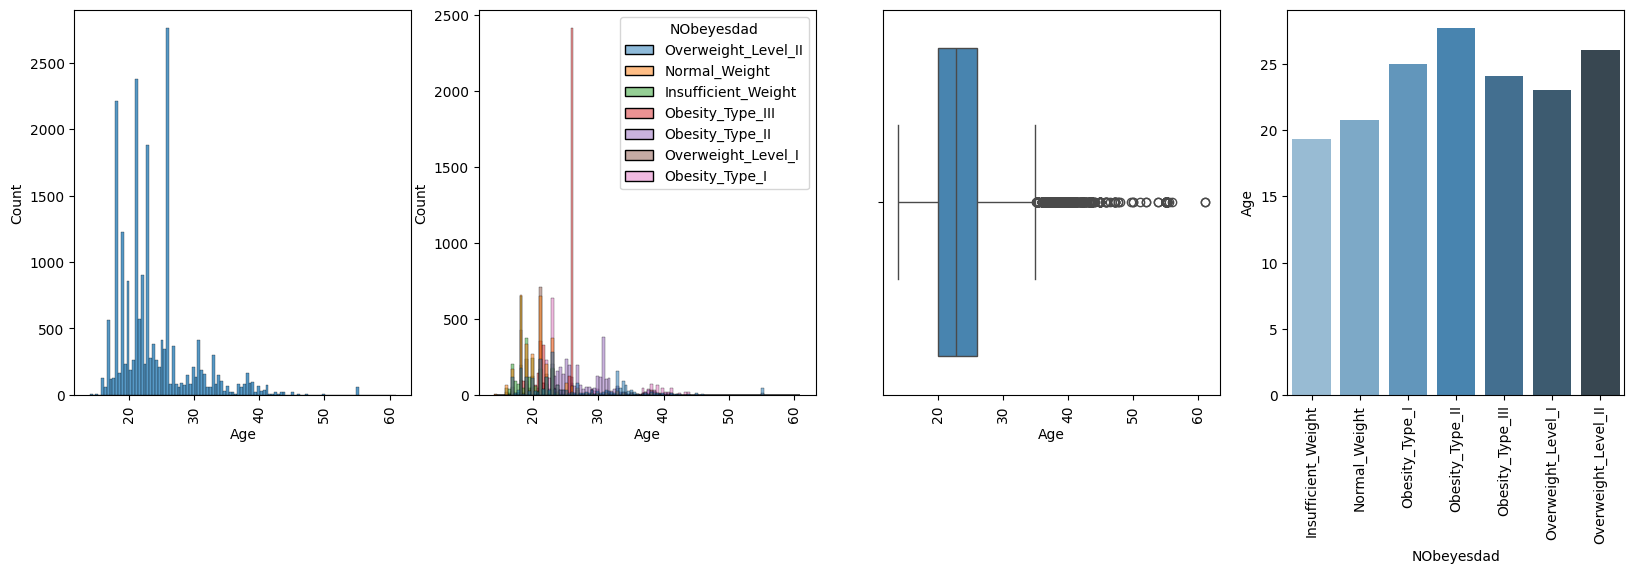

In [44]:
plot_numerical_data(train, "Age")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


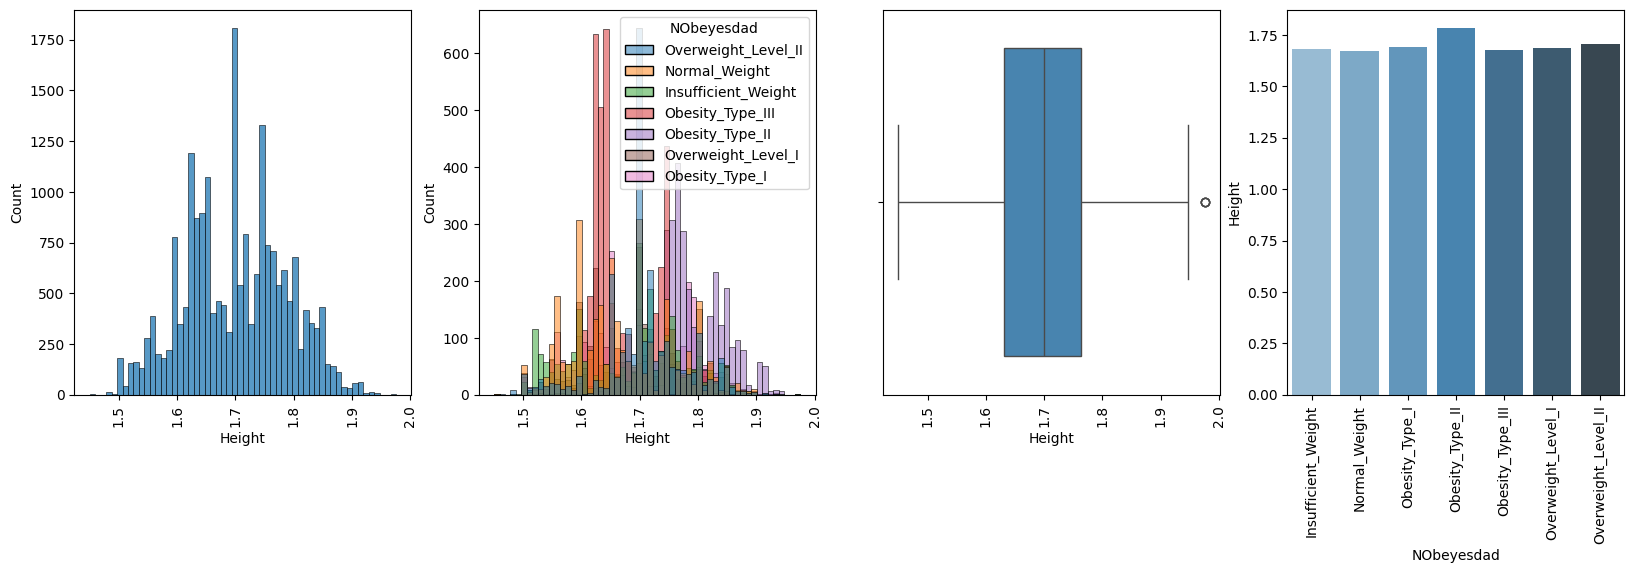

In [45]:
plot_numerical_data(train, "Height")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


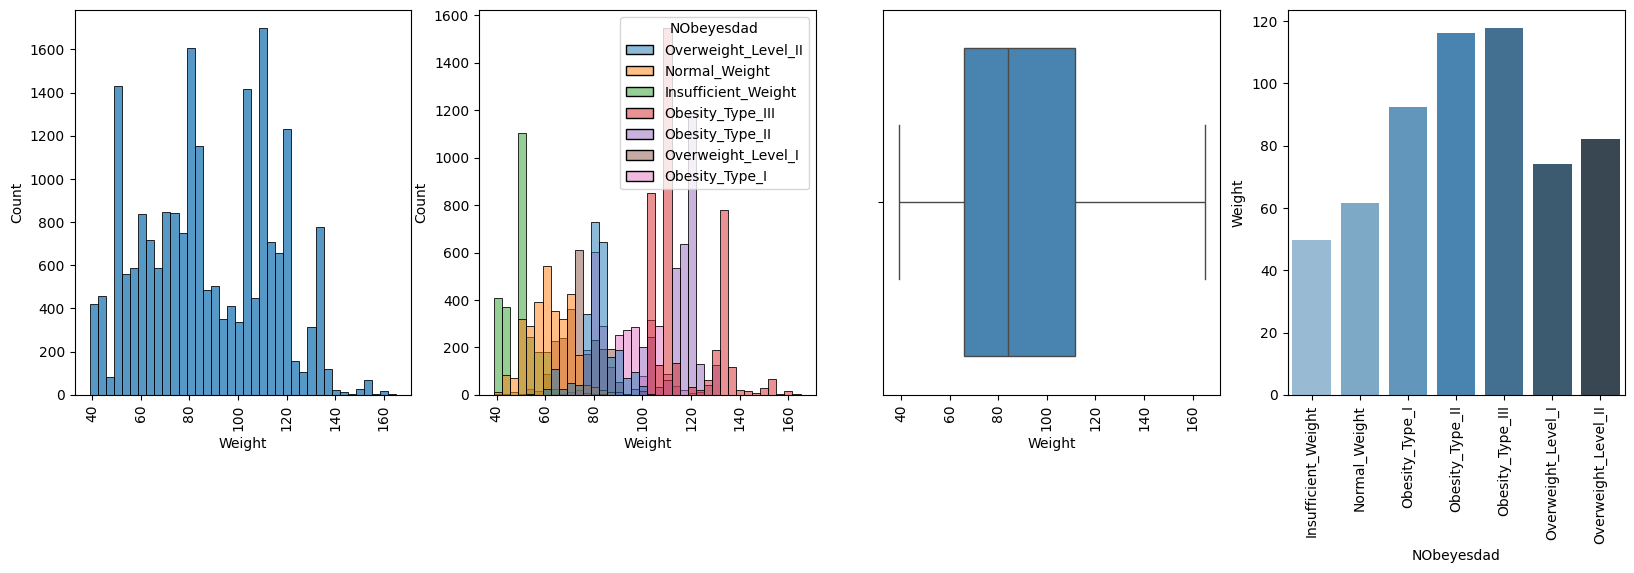

In [46]:
plot_numerical_data(train, "Weight")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


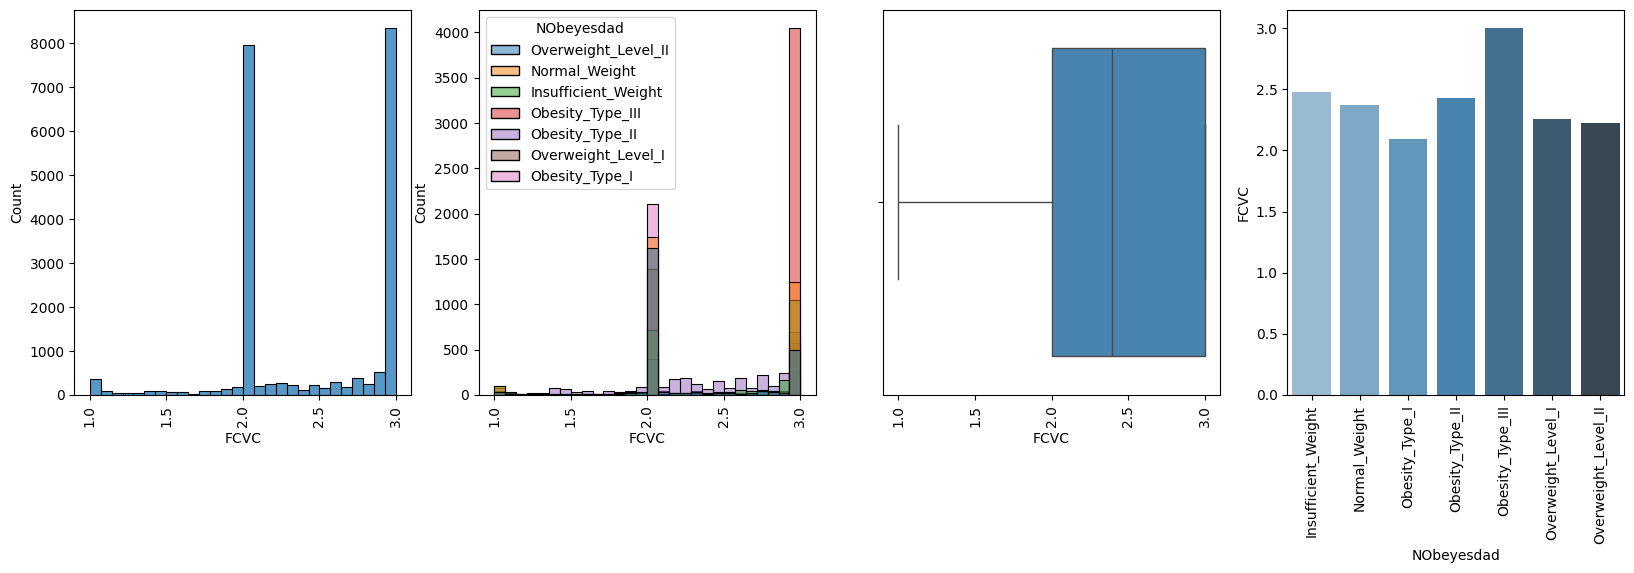

In [47]:
plot_numerical_data(train, "FCVC")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


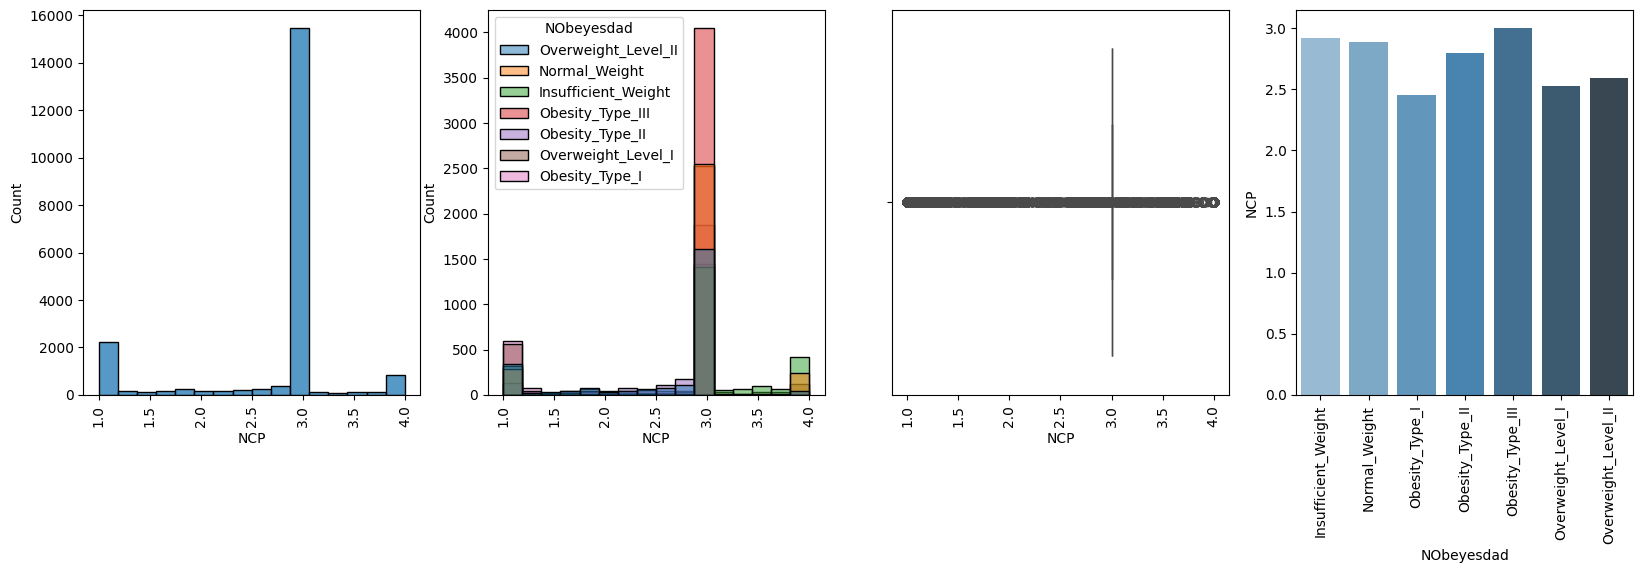

In [48]:
plot_numerical_data(train, "NCP")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


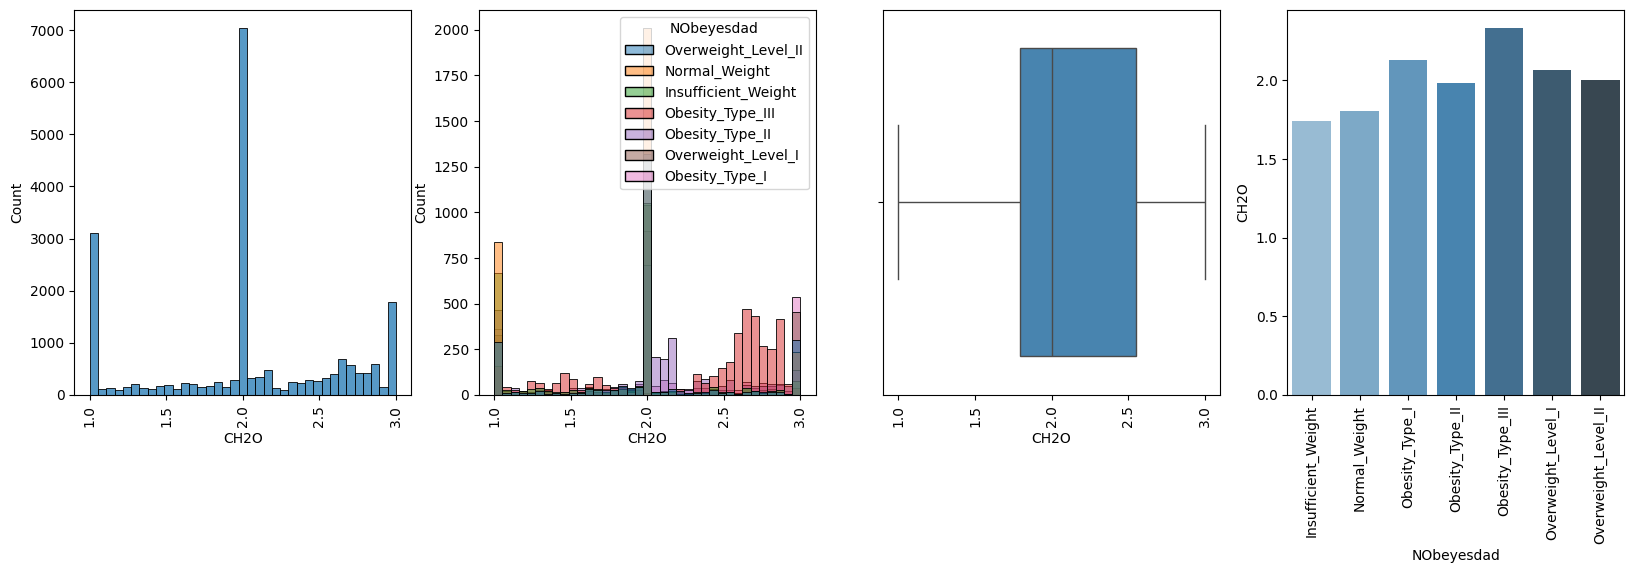

In [49]:
plot_numerical_data(train, "CH2O")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


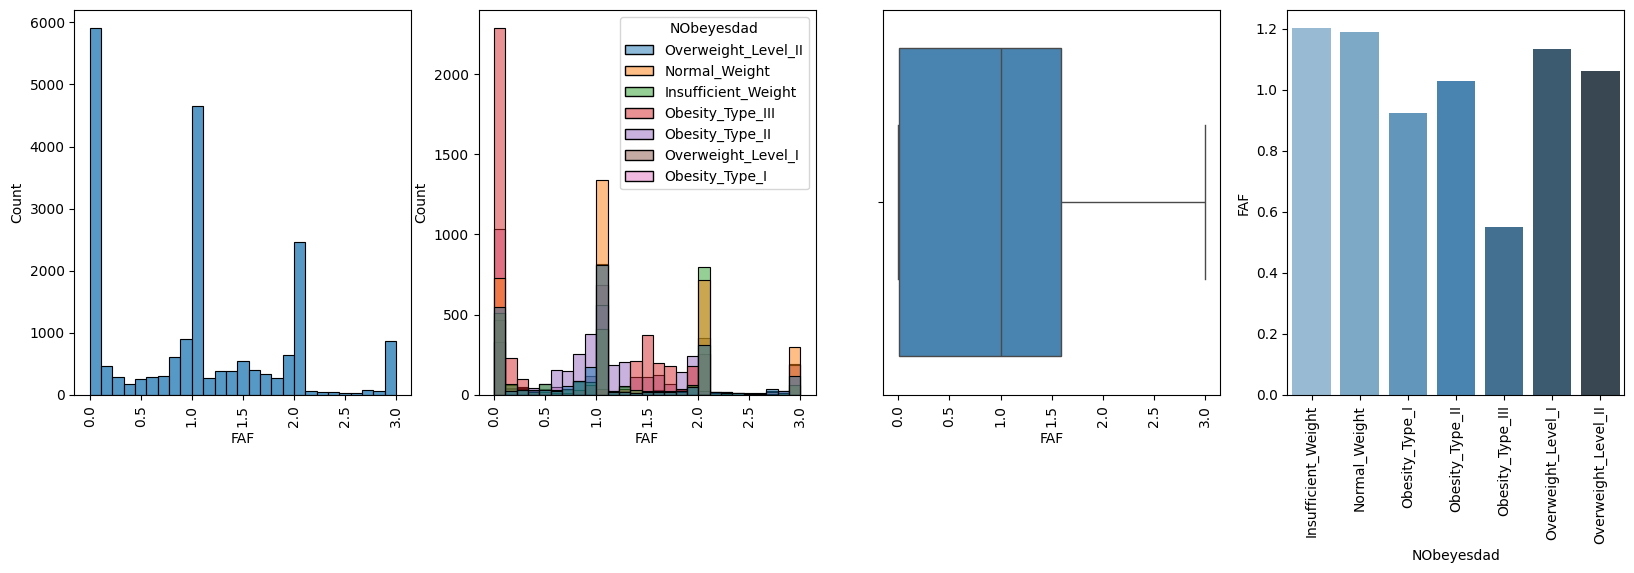

In [50]:
plot_numerical_data(train, "FAF")

/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/Prediction-of-Obesity-Risk/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


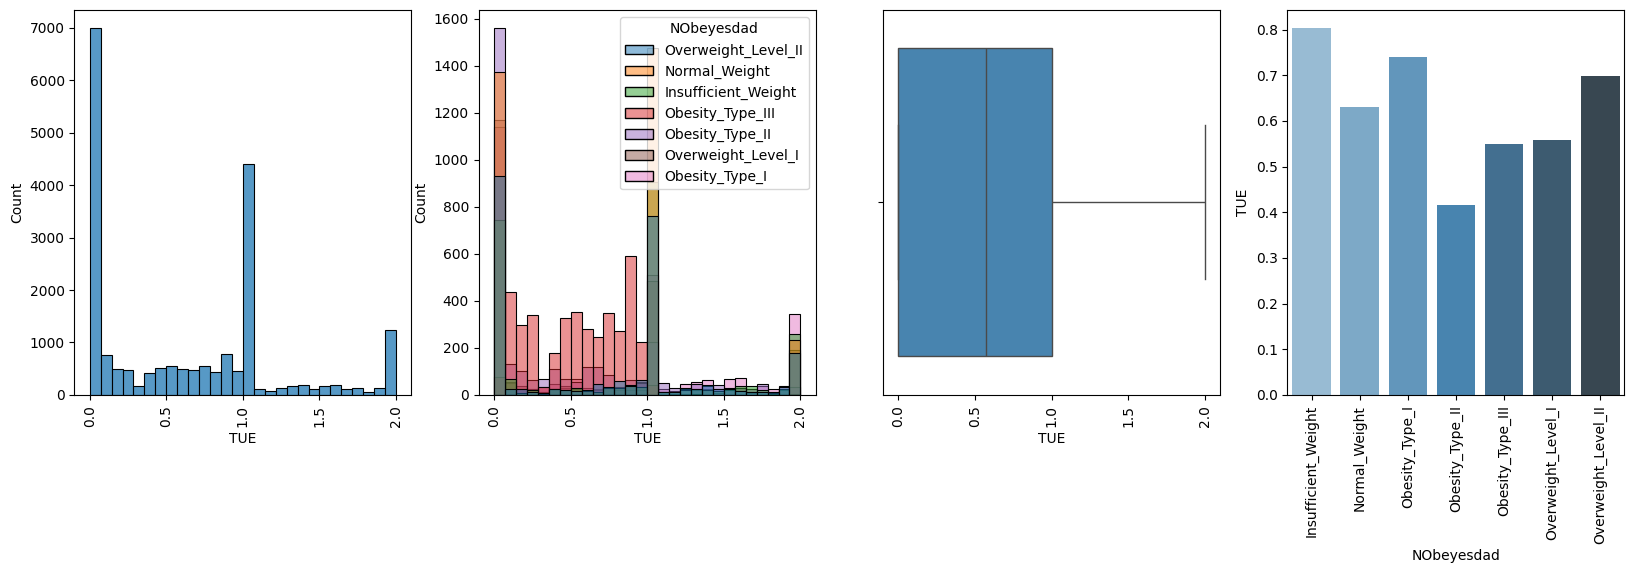

In [51]:
plot_numerical_data(train, "TUE")

### Correlation Matrix

- between Numerical Data

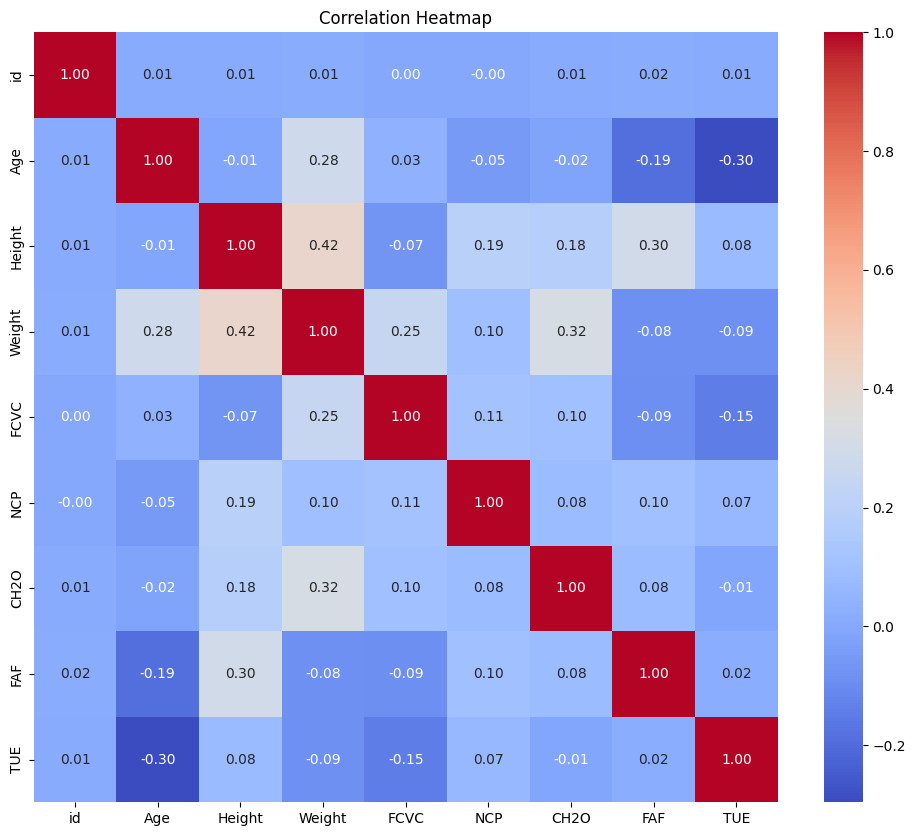

In [52]:
# print the heat map of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(train[numerical.columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

- Between numerical features and categorical features

In [201]:
gender_mapping = {'Male': 0, 'Female': 1}
yes_no_mapping = {'no': 0, 'yes': 1}
freq_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
transportion_mapping = {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4}
target_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
mapping_dict = {
    'Gender' : gender_mapping,
    'family_history_with_overweight' : yes_no_mapping,
    'FAVC' : yes_no_mapping,
    'CAEC': freq_mapping,
    'SMOKE': yes_no_mapping,
    'SCC': yes_no_mapping,
    'CALC': freq_mapping,
    'MTRANS': transportion_mapping,
    'NObeyesdad': target_mapping
}

def preprocess(df):
    df = df.copy()
    for col, mapping in mapping_dict.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)
    df = df.drop(columns=['id'])
    return df

In [204]:
train = preprocess(train)

<Axes: >

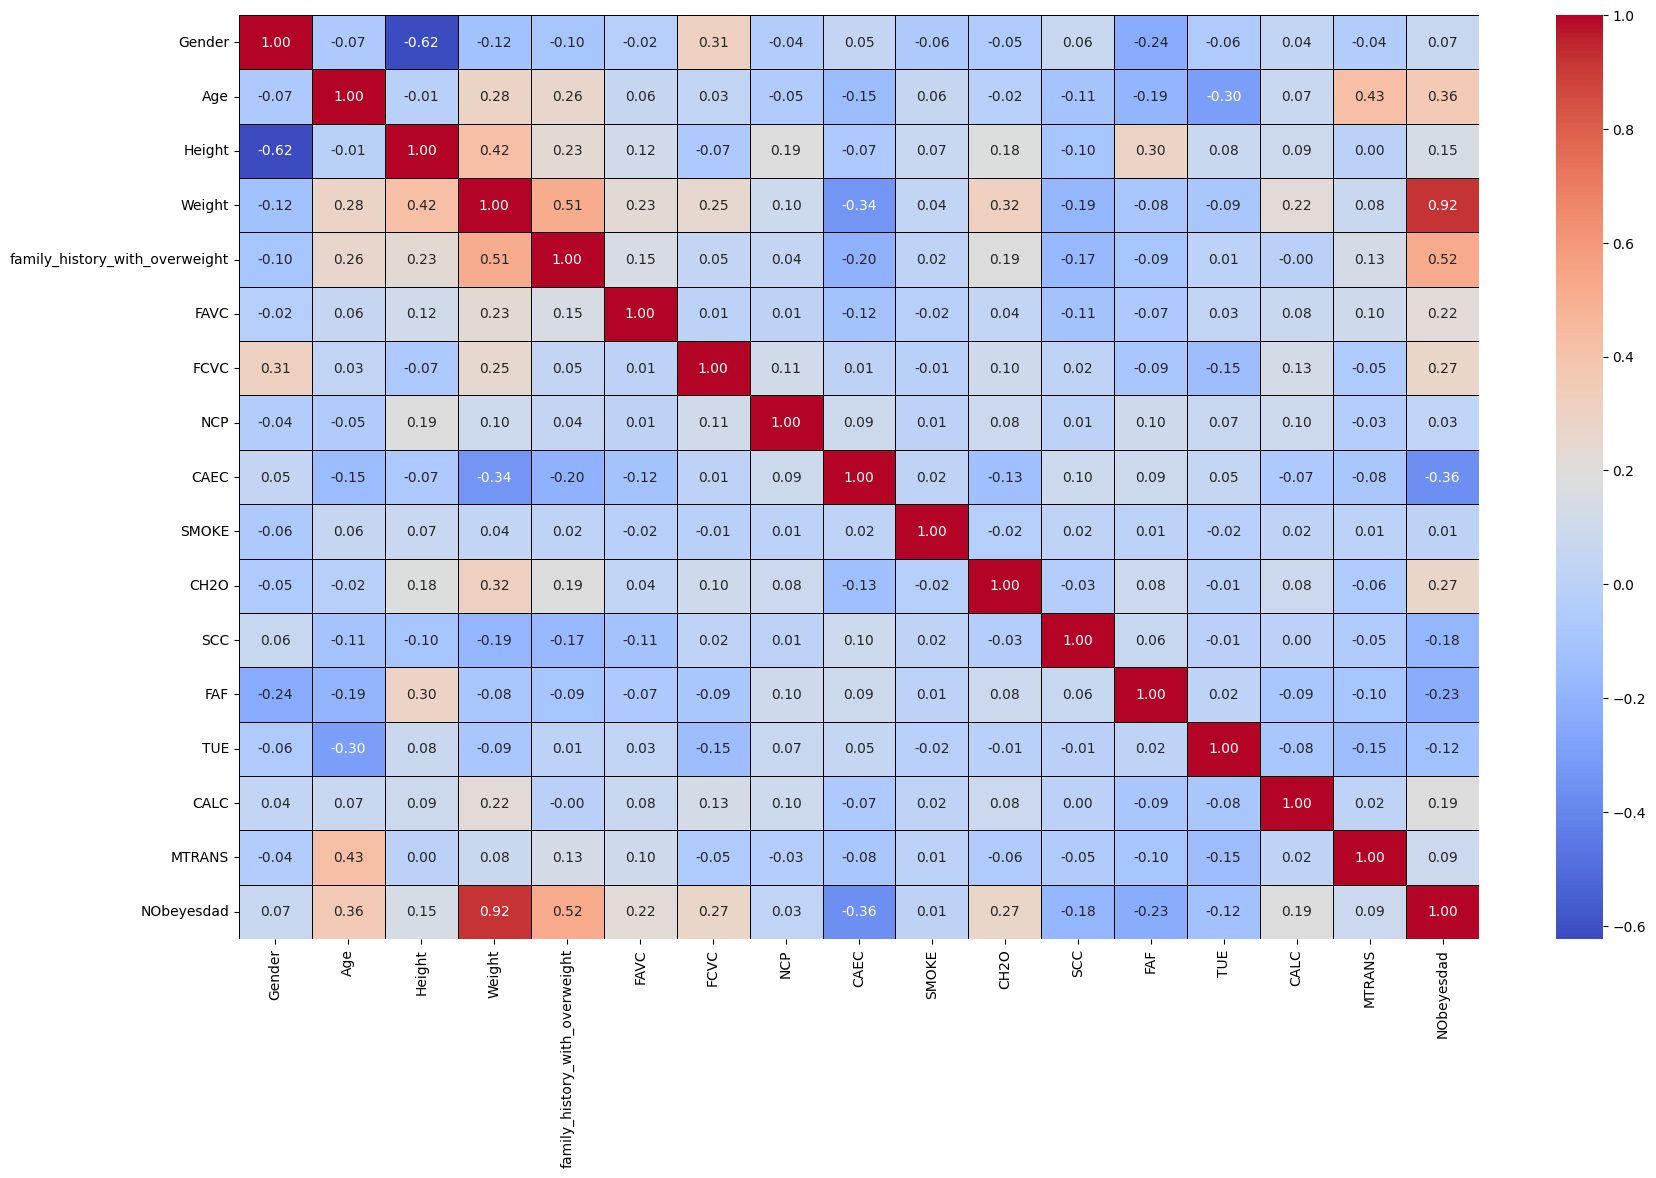

In [205]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True)

weight and family history are the most factors that affects the result 

## `05` Data Preparation

In [217]:
train2 = train_df.copy()

In [218]:
train2 = preprocess(train2)

In [226]:
train , test = train_test_split(train2, test_size=0.2, random_state=RANDOM_SEED)

In [227]:
X_train = train.drop(columns=['NObeyesdad'])
y_train = train['NObeyesdad']
X_test = test.drop(columns=['NObeyesdad'])
y_test = test['NObeyesdad']

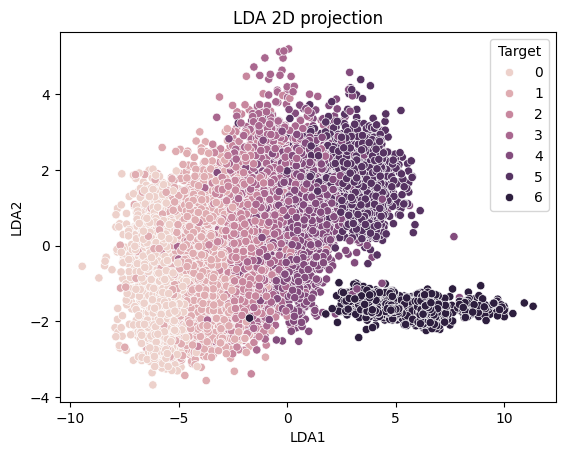

In [230]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Create a DataFrame for plotting
lda_df = pd.DataFrame({'LDA1': X_lda[:, 0], 'LDA2': X_lda[:, 1], 'Target': y_train})
sns.scatterplot(data=lda_df, x='LDA1', y='LDA2', hue='Target')
plt.title('LDA 2D projection')
plt.show()

Data is not linearly distributed
so logistic regression is not option 

In [232]:
# Scale the data after splitting to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## `06` Model

### Implement the random forest classifier

In [249]:
# Create the model
rf = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       524
           1       0.84      0.89      0.86       626
           2       0.78      0.75      0.77       484
           3       0.80      0.81      0.81       514
           4       0.89      0.87      0.88       543
           5       0.98      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [131]:
# %pip install xgboost

In [132]:
# %pip install lightgbm

### Implement the XGBoost classifier


In [250]:
# Create the model
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, subsample=0.8, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.87      0.90      0.89       626
           2       0.79      0.77      0.78       484
           3       0.79      0.82      0.80       514
           4       0.90      0.87      0.89       543
           5       0.98      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



- subsample < 1:
- Adds randomness → helps prevent overfitting.

- Speeds up training.

- Improves generalization.

### Implement the LightGBM classifier

In [235]:
# Create the model
lgb_model = LGBMClassifier(random_state=42)

# Fit the model on the training data
lgb_model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred_lgb))


# print the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy: {accuracy:5f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2027
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.88      0.89      0.89       626
           2       0.79      0.80      0.79       484
           3       0.80      0.82      0.81       51

/home/israa/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Feature importance

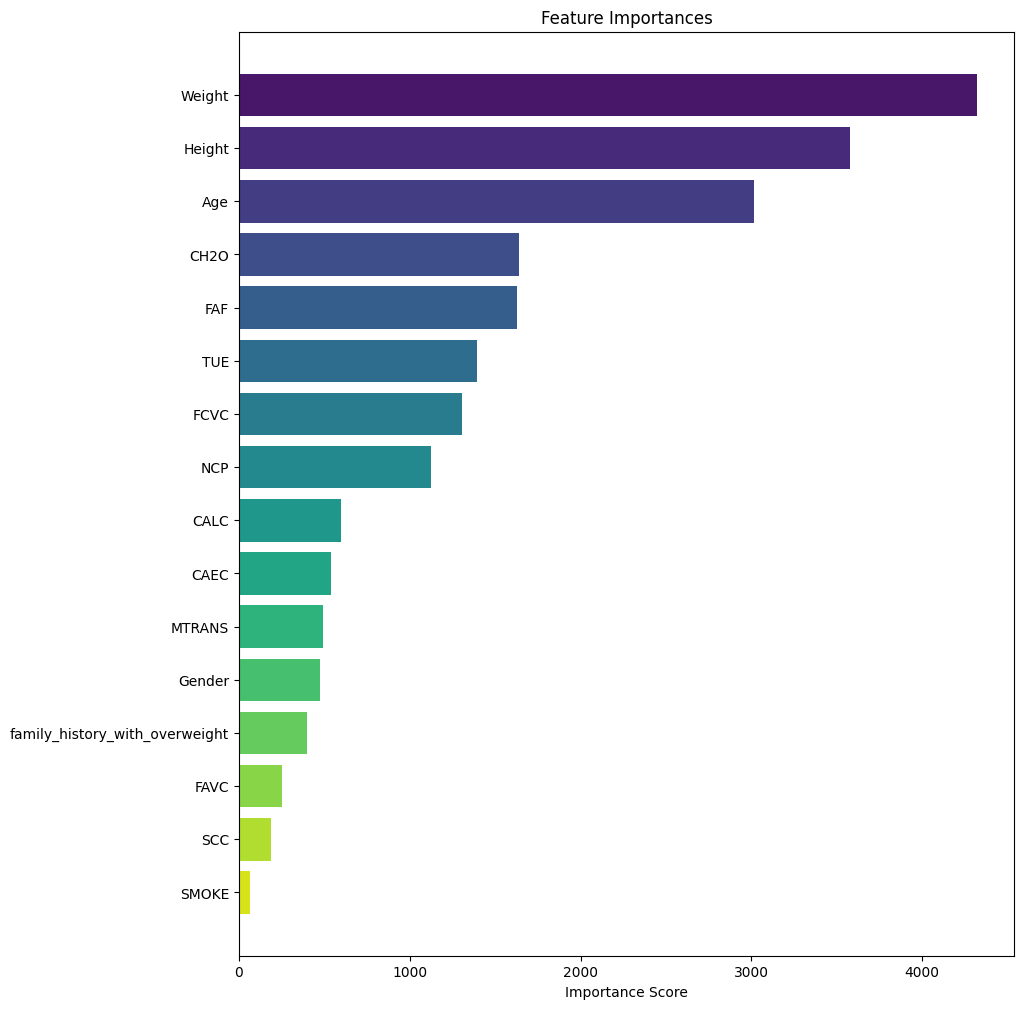

In [237]:
importances = lgb_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest
plt.figure(figsize=(10, 12))
plt.title("Feature Importances")
colors = sns.color_palette("viridis", len(importances))
plt.barh(range(X_train.shape[1]), importances[indices], color=colors)
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()  # Invert y-axis to match ranking order
plt.xlabel("Importance Score")
plt.show()


## `07` Map back the predictions

In [270]:
def map_back(predictions, true_labels):
    """
    Maps predictions back to their original labels.
    Assumes predictions and true_labels are pandas Series or numpy arrays.
    """
    target_map = {"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3,
                "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}
    
    # Create a reverse mapping
    reverse_map = {v: k for k, v in target_map.items()}
    
    # Map the predictions and true labels
    predictions = [reverse_map[p] for p in predictions]
    true_labels = [reverse_map[t] for t in true_labels]

    return pd.DataFrame({'Predicted': predictions, 'True': true_labels}).reset_index(drop=True)

In [269]:
y_pred_mapped = map_back(y_pred_lgb, y_test)
y_pred_mapped

,Predicted,True
0,Obesity_Type_III,Obesity_Type_III
1,Overweight_Level_I,Overweight_Level_I
2,Obesity_Type_I,Obesity_Type_I
3,Obesity_Type_II,Obesity_Type_II
4,Normal_Weight,Insufficient_Weight
...,...,...
4147,Normal_Weight,Normal_Weight
4148,Obesity_Type_I,Obesity_Type_I
4149,Obesity_Type_I,Obesity_Type_I
4150,Overweight_Level_I,Overweight_Level_I


## `08` Test & submission save

In [259]:
test = test_df.copy()

In [260]:
test = preprocess(test)

In [261]:
# scale the test data
test = scaler.transform(test)

In [262]:
def map_predictions_to_labels(predictions):
    reverse_map = {
        0: "Insufficient_Weight",
        1: "Normal_Weight",
        2: "Overweight_Level_I",
        3: "Overweight_Level_II",
        4: "Obesity_Type_I",
        5: "Obesity_Type_II",
        6: "Obesity_Type_III"
    }
    return [reverse_map[pred] for pred in predictions]

In [263]:
y_prediction = lgb_model.predict(test)
y_prediction

/home/israa/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([5, 2, 6, ..., 0, 1, 5])

In [264]:
y_prediction_back = map_predictions_to_labels(y_prediction)

In [265]:
# save the submission file
submission = pd.DataFrame({'id': test_df['id'], 'NObeyesdad': y_prediction_back})

In [266]:
submission.to_csv('Data/submission.csv', index=False)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
